# SVM (Support Vector Machine)

#### Recomendado para datasets pequeños.
#### El algoritmo busca la mejor línea que separa las clases.

Importaciones

In [234]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Definición de la clase SVM

In [235]:
class SVM:
    """
    Support Vectors Machine (SVM)

    Parameters:
    -----------
    learning_rate : float, optional (default=0.001)
        La tasa de aprendizaje para la actualización de los pesos.
    lambda_param : float, optional (default=0.01)
        El parámetro de regularización.
    n_iters : int, optional (default=1000)
        El número de iteraciones para el entrenamiento.

    Attributes:
    -----------
    w : ndarray de forma (n_features,)
        Los pesos del modelo SVM.
    b : float
        El término de sesgo del modelo SVM.
    """

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        """
        Ajusta el modelo SVM según los datos de entrenamiento dados.

        Parameters:
        -----------
        X : ndarray de forma (n_samples, n_features)
            Datos de entrenamiento.
        y : ndarray de forma (n_samples,)
            Valores objetivo.
        """
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        # Inicializar pesos
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        """
        Realiza la clasificación en las muestras de X.

        Parameters:
        -----------
        X : ndarray de forma (n_samples, n_features)
            Datos de entrada.

        Returns:
        --------
        y_pred : ndarray de forma (n_samples,)
            Etiquetas de clase predichas para las muestras en X.
        """
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

# Testing

In [236]:
def accuracy(y_true, y_pred):
    """
    Calcula la precisión de las predicciones

    Parameters:
    -----------
    y_true : ndarray
        True labels.
    y_pred : ndarray
        Predicted labels.

    Returns:
    --------
    float
        Precisión de las predicciones
    """
    return np.sum(y_true == y_pred) / len(y_true)


Probando la implementación con un dataset de sklearn

In [237]:
X, y = datasets.make_blobs(n_samples=250, n_features=2, centers=2, cluster_std=1.45, random_state=40)

# Convertir etiquetas a -1 y 1
y = np.where(y == 0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6)

clf = SVM()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print("SVM classification accuracy", accuracy(y_test, predictions))

SVM classification accuracy 0.9933333333333333


# Visualización de los resultados

In [238]:
def get_hyperplane_value(x, w, b, offset):
    return (-w[0] * x + b + offset) / w[1]

In [239]:
def visualize_svm(size, colors, background_color):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_facecolor(background_color)  # Set the background color
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=colors['scatter'])

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], colors['hyperplane'])
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], colors['margin'])
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], colors['margin'])

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])
    # Set plt size
    plt.figure(figsize=size)

    # Show plot
    plt.show()

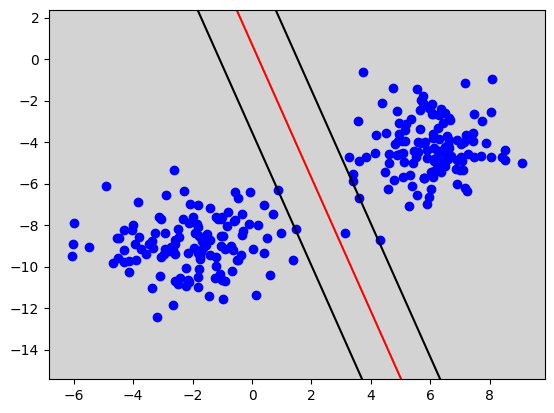

<Figure size 1400x1000 with 0 Axes>

In [240]:
colors = {
    'scatter': 'blue',
    'hyperplane': 'red',
    'margin': 'black'
}
visualize_svm(size=(14, 10), colors=colors, background_color='lightgray')